In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
starbucks = pd.read_csv("starbucks_customers.csv", delimiter = ";")
starbucks.head()

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout
0,13,8,52,4,4,4,4,4,4,4
1,25,8,35,4,5,5,4,4,3,3
2,10,8,29,2,1,5,2,2,2,2
3,7,8,28,4,1,4,5,3,3,4
4,10,8,28,4,2,4,4,3,4,3


In [4]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   spent              122 non-null    int64
 1   nearest_starbucks  122 non-null    int64
 2   age                122 non-null    int64
 3   rate_quality       122 non-null    int64
 4   rate_price         122 non-null    int64
 5   rate_promo         122 non-null    int64
 6   ambiance           122 non-null    int64
 7   wifi               122 non-null    int64
 8   service            122 non-null    int64
 9   meetings_hangout   122 non-null    int64
dtypes: int64(10)
memory usage: 9.7 KB


In [5]:
#check for missing values
starbucks.isnull().sum()

spent                0
nearest_starbucks    0
age                  0
rate_quality         0
rate_price           0
rate_promo           0
ambiance             0
wifi                 0
service              0
meetings_hangout     0
dtype: int64

In [7]:
#to find the mean of the ages of people buying coffee
age = starbucks["age"]
age_mean = np.mean(max(age) - min(age))
age_mean

57.0

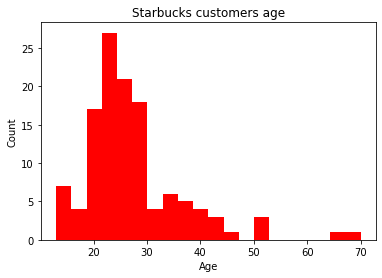

In [8]:
#to find the distribution of the age of customers with a histogram
plt.hist(age, bins = 20, color = 'r')
plt.title('Starbucks customers age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('./starbucks_customers_age.png', dpi = 100)
plt.show()

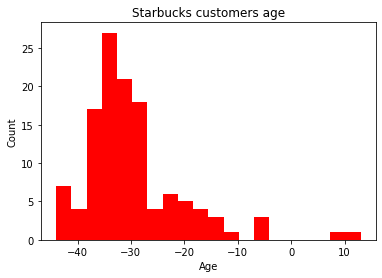

In [9]:
#to find the values by which the ages divert from the mean age and plot a histogram distribution to detect outliers in the 'age' variable values
centered_age = age - age_mean
plt.hist(centered_age, bins = 20, color = 'r')
plt.title('Starbucks customers age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('./starbucks_customers_age_centered.png', dpi = 100)
plt.show()

In [24]:
#to normalize ages by standard normalization
standard_ages = (age - np.mean(age))/(np.std(age))
standard_mean = np.mean(standard_ages)
standard_normal = np.std(standard_ages)
standard_ages
print(standard_mean)
print(standard_normal)

1.601633215852685e-16
1.0000000000000002


In [25]:
#Create an object for Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
#reshape and scale the age variable
ages_reshape = np.array(age).reshape(-1,1)
ages_scaled = scaler.fit_transform(ages_reshape)
print(np.mean(ages_scaled))
print(np.std(ages_scaled))

1.7290358580227847e-16
0.9999999999999999


In [27]:
#prepare and normalize the spent variable for scaling and find the amount of money spent on coffee according to age
spent = starbucks['spent']
spent_normal = (spent - min(spent))/(max(spent) - min(spent))
spent_normal

0      0.464286
1      0.892857
2      0.357143
3      0.250000
4      0.357143
         ...   
117    0.178571
118    0.571429
119    0.071429
120    0.678571
121    0.107143
Name: spent, Length: 122, dtype: float64

In [28]:
#since this normalizes price range, we shall normalize it using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

In [29]:
#reshape and scale the age variable
spent_reshape = np.array(age).reshape(-1,1)
spent_scaled = mmscaler.fit_transform(ages_reshape)
print(np.min(spent_scaled))
print(np.max(spent_scaled))

0.0
0.9999999999999998


13 70
0    [40, 71)
1    [30, 40)
2    [20, 30)
3    [20, 30)
4    [20, 30)
5    [20, 30)
6    [20, 30)
7    [20, 30)
8    [20, 30)
9    [20, 30)
Name: binned_ages, dtype: category
Categories (4, interval[int64, left]): [[12, 20) < [20, 30) < [30, 40) < [40, 71)]


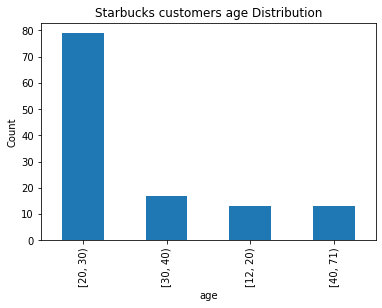

In [32]:
#find the minimum and maximum ages of the customers buying coffee at Starbucks
print(np.min(age), np.max(age))

age_bins = [12, 20, 30, 40, 71]

starbucks["binned_ages"] = pd.cut(starbucks['age'], age_bins, right = False)
print(starbucks["binned_ages"].head(10))

# Plot the bar graph of binned distances
starbucks['binned_ages'].value_counts().plot(kind='bar')

# Label the bar graph
plt.title('Starbucks customers age Distribution')
plt.xlabel('age')
plt.ylabel('Count')

# Show the bar graph
plt.show()

In [33]:
starbucks

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout,binned_ages
0,13,8,52,4,4,4,4,4,4,4,"[40, 71)"
1,25,8,35,4,5,5,4,4,3,3,"[30, 40)"
2,10,8,29,2,1,5,2,2,2,2,"[20, 30)"
3,7,8,28,4,1,4,5,3,3,4,"[20, 30)"
4,10,8,28,4,2,4,4,3,4,3,"[20, 30)"
...,...,...,...,...,...,...,...,...,...,...,...
117,5,0,22,3,4,5,4,3,4,2,"[20, 30)"
118,16,0,22,4,3,5,4,4,5,5,"[20, 30)"
119,2,0,20,4,3,5,5,4,4,3,"[20, 30)"
120,19,0,20,4,4,4,4,4,4,4,"[20, 30)"


In [35]:
cars = pd.read_csv('cars.csv', delimiter = ";")
cars.head(10)

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
0,449069,2006,Chrysler,300,Base,Sedan,automatic,2c3ka43r76h366165,il,1.9,119618.0,blue,gray,go financial,4775,2500,Thu May 28 2015 03:00:00 GMT-0700 (PDT),NaN
1,197199,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,—,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT),NaN
2,288171,2007,Dodge,Durango,SLT,SUV,automatic,1d8hd48p97f510727,fl,1.9,166628.0,gold,tan,mid atlantic finance/clearwater,2850,2700,Wed Feb 11 2015 08:00:00 GMT-0800 (PST),NaN
3,277025,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb3da735753,tx,3.8,23923.0,white,off-white,mercedes-benz financial services,32200,32000,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),NaN
4,322760,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d84dgc59887,mi,5.0,18494.0,red,black,"ford motor credit company,llc",29100,28100,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT),NaN
5,308700,2013,Ford,Fusion,SE,Sedan,automatic,3fa6p0hr7dr127722,il,4.1,21798.0,silver,beige,"ford motor credit company,llc",15450,16600,Thu Feb 19 2015 02:00:00 GMT-0800 (PST),NaN
6,264244,2012,Toyota,Sienna,LE 8-Passenger,Minivan,automatic,5tdkk3dc0cs185967,fl,4.4,49648.0,blue,tan,world omni financial corporation,16900,18600,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),NaN
7,334017,2008,Honda,Accord,EX-L V-6,Sedan,automatic,1hgcp36808a078308,fl,2.8,103253.0,silver,gray,holman honda of fort lauderdale,9550,9300,Fri Feb 20 2015 09:35:00 GMT-0800 (PST),NaN
8,492351,2012,Nissan,Rogue,S,suv,automatic,jn8as5mv5cw410901,tx,3.5,28592.0,silver,black,nissan-infiniti lt,17000,16800,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT),NaN
9,360022,2008,Chevrolet,Tahoe,LT,SUV,automatic,1gnfc13068r168582,ca,1.9,95544.0,black,black,exeter finance corp,17550,19000,Thu Feb 26 2015 04:00:00 GMT-0800 (PST),NaN


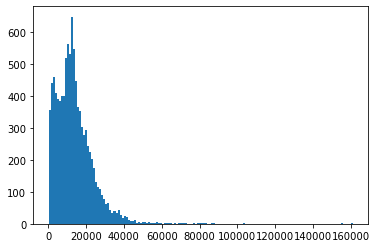

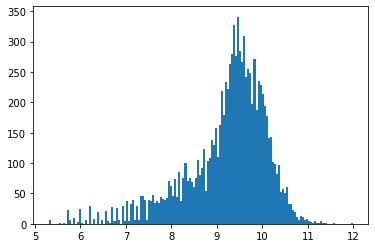

In [36]:
# set you price variable, which is the selling price of the cars listed
prices = cars['sellingprice']

## plot a histogram of prices
plt.hist(prices, bins = 150)
plt.show();
## log transform prices
log_prices = np.log(prices)

## plot a histogram of log_prices
plt.hist(log_prices, bins = 150)
plt.show()

In [37]:
cars["make"].unique()

array(['Chrysler', 'Volkswagen', 'Dodge', 'Mercedes-Benz', 'Ford',
       'Toyota', 'Honda', 'Nissan', 'Chevrolet', 'Jeep', 'Hyundai', 'GMC',
       'Jaguar', 'Audi', 'Lexus', 'Pontiac', 'BMW', nan, 'Suzuki',
       'Mitsubishi', 'Kia', 'MINI', 'Ram', 'Acura', 'Subaru', 'Buick',
       'Mazda', 'Volvo', 'Infiniti', 'mazda', 'cadillac', 'Isuzu', 'bmw',
       'Mercury', 'Land Rover', 'Lincoln', 'smart', 'nissan', 'HUMMER',
       'Cadillac', 'Saturn', 'Scion', 'Saab', 'FIAT', 'Porsche',
       'Rolls-Royce', 'Oldsmobile', 'chevrolet', 'lexus', 'mercedes',
       'ford', 'chrysler', 'Daewoo', 'Maserati', 'hyundai', 'dodge',
       'toyota', 'land rover', 'jeep', 'mitsubishi', 'subaru',
       'oldsmobile', 'honda'], dtype=object)